## Observations and Insights 

Ramicane and Capomulin both resulted in lower tumor volumes than Infubinol and Ceftamin. This means that they may be more effective. 

Mouse s185 had decreasing tumor volume across time points, which means that Capomulin was effective for reducing their tumor. 

Increasing mouse weight is associated with increasing tumor volume, which means that bigger mice have bigger tumors on average, which is sensible. 

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1 = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
df1.head()
df1.to_csv("mouseid.csv")

In [164]:
# Checking the number of mice
df1["Mouse ID"].nunique()

249

In [165]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = df1[df1.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]

In [166]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df1[df1["Mouse ID"] != "g989"]

In [168]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

dfmean = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
dfmedian = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
dfvar = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
dfsd = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
dfSEM = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

dfsum = pd.DataFrame({"Mean": dfmean, "Median": dfmedian, "Variance": dfvar, 
                      "Std Dev.": dfsd, "Std Error": dfSEM})
dfsum

,Mean,Median,Variance,Std Dev.,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [170]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df["Tumor Volume (mm3)"].agg(["mean", "median", "var",  "std", "sem"])

mean      50.435293
median    48.933454
var       79.462907
std        8.914197
sem        0.205591
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

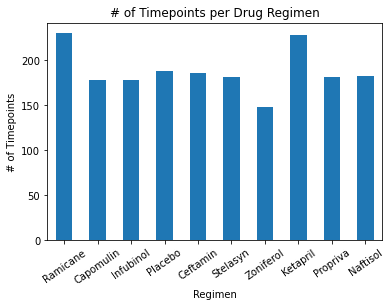

In [171]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen = df["Drug Regimen"].unique().tolist()
timepoints = df.groupby(["Drug Regimen"])["Timepoint"].count().tolist()
dfbar = pd.DataFrame({"Regimen": regimen, "Timepoints": timepoints})
dfbar.plot.bar("Regimen", "Timepoints", legend = False, 
               ylabel = "# of Timepoints", title = "# of Timepoints per Drug Regimen", rot = 35);

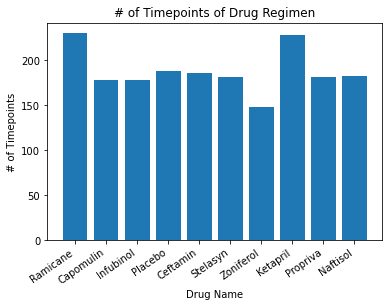

In [172]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen = df["Drug Regimen"].unique().tolist()
timepoints = df.groupby(["Drug Regimen"])["Timepoint"].count().tolist()
plt.xticks(rotation = 35, ha = "right")
plt.bar(regimen, timepoints)
plt.xlabel("Drug Name")
plt.ylabel("# of Timepoints")
plt.title("# of Timepoints of Drug Regimen");

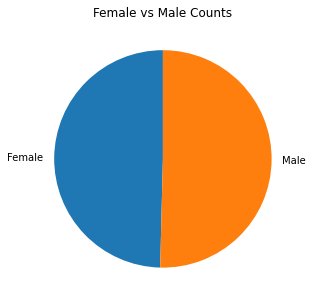

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female = df.groupby("Sex")["Mouse ID"].nunique()[0]
male = df.groupby("Sex")["Mouse ID"].nunique()[1]
dfpie = pd.DataFrame({'Count': [female, male]},
                  index=["Female", "Male"])
dfpie.plot.pie(y='Count', figsize=(5, 5), startangle = 90, title = "Female vs Male Counts", legend = False, ylabel = "");

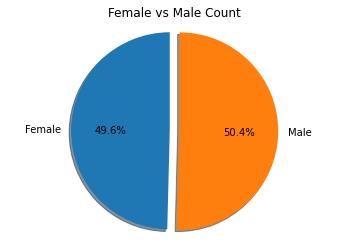

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [female, male]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Female vs Male Count");

## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

subsetdf = df[(df["Drug Regimen"] == "Capomulin") | (df["Drug Regimen"] == "Ramicane") | 
              (df["Drug Regimen"] == "Infubinol") | (df["Drug Regimen"] == "Ceftamin")]
subsetdf
# Start by getting the last (greatest) timepoint for each mouse
subsetdf = subsetdf.groupby("Mouse ID").last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
subsetdf

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [176]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = subsetdf["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumovol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for one_drug in regimens:
    quartiles  = subsetdf.loc[subsetdf["Drug Regimen"] == one_drug, 'Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    quartiles

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'============={one_drug}=============')

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    median = quartiles[0.5]
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumovol.append(quartiles)
    # Determine outliers using upper and lower bounds

=============Infubinol=============
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
=============Ceftamin=============
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
=============Ramicane=============
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
=============Capomulin=============
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
T

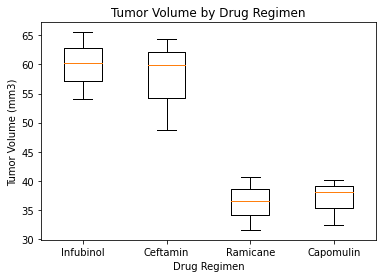

In [177]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumovol, labels = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"])
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Volume by Drug Regimen");

## Line and Scatter Plots

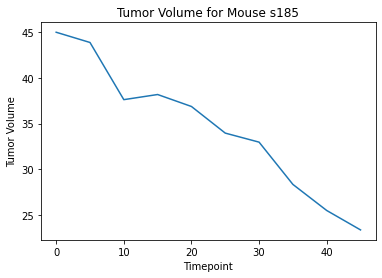

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capsubs185 = df[(df["Drug Regimen"] == "Capomulin") & (df["Mouse ID"] == "s185")]
plots185 = capsubs185.plot.line("Timepoint", "Tumor Volume (mm3)", legend = False, 
                            xlabel = "Timepoint", ylabel = "Tumor Volume", title = "Tumor Volume for Mouse s185");

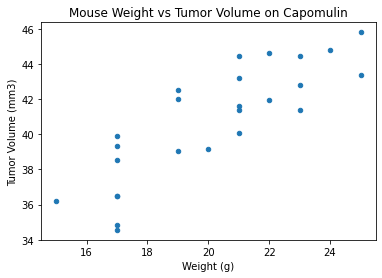

In [179]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capsub = df[(df["Drug Regimen"] == "Capomulin")]
capavg = capsub.groupby(['Mouse ID']).mean()
capavg.plot.scatter("Weight (g)", "Tumor Volume (mm3)", title = "Mouse Weight vs Tumor Volume on Capomulin");

## Correlation and Regression

In [180]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor = capavg.loc[:,"Tumor Volume (mm3)"]
weight = capavg.loc[:,"Weight (g)"]
correlation = st.pearsonr(weight, tumor)
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")

The correlation between tumor volume and mouse weight is 0.84


In [181]:
tumor = capavg.loc[:,"Tumor Volume (mm3)"]
weight = capavg.loc[:,"Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
print(f"y = {str(round(slope,2))}x + {str(round(intercept,2))}")

y = 0.95x + 21.55


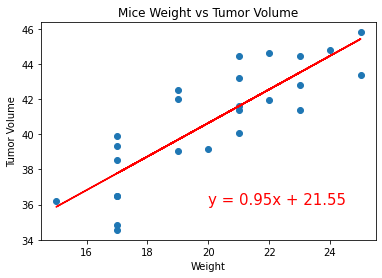

In [182]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
plt.xlabel('Weight')
plt.title('Mice Weight vs Tumor Volume')
plt.ylabel('Tumor Volume');